# Plots Solution from ILOG

See ilog_sol_size.mod

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

#plt.style.use('bmh')

In [2]:
def get_main_room():
    main_room = pd.read_excel("data/main_room.xlsx", header=None, index_col=0)
    length, width = main_room.loc["length", 1], main_room.loc["width", 1]

    return length, width

In [3]:
len_max, wid_max = get_main_room()

In [19]:
def get_rooms():
    patches = []
    labels = []
    rooms = pd.read_excel("data/sol_lin_sizes.xlsx")
    for line in rooms.itertuples():
        patches.append(mpatches.Rectangle([line.x, line.y], line.dx, line.dy))
        labels.append((line.x + line.dx/2, line.y + line.dy/4, str(line.room)))
    return patches, labels

In [20]:
rooms, labels = get_rooms()

In [21]:
colors = np.linspace(0, 1, len(rooms))

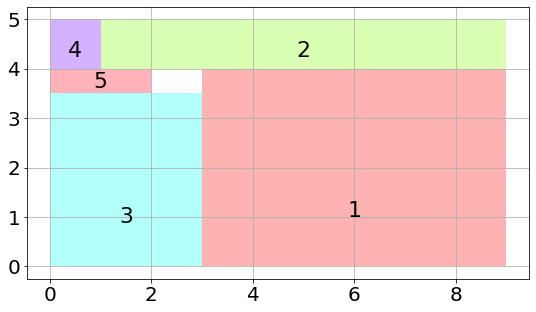

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
collection = PatchCollection(rooms, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(colors)
ax.add_collection(collection)
for x, y, txt in labels:
    plt.text(x, y, txt, ha="center", family='sans-serif', size=22)

plt.plot([0, len_max], [0, wid_max], lw=0) # junk line to make the proper image size for patches otherwise it is (1, 1)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.show()